In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# File: TBMT.py

### Run once at start
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pylab as plt
plt.style.use(['science','ieee'])
from scipy.constants import *
import matplotlib.gridspec as gridspec



In [3]:

time.time()

NameError: name 'time' is not defined

In [23]:
##########################################################
# Functions and constants for Volkov
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])
# print(pauli_z)

gamma0 = np.array([[1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,-1]])
gamma1 = np.array([[0,0,0,1],[0,0,1,0],[0,-1,0,0],[-1,0,0,0]])
gamma2 = np.array([[0,0,0,-1j],[0,0,1j,0],[0,1j,0,0],[-1j,0,0,0]])
gamma3 = np.array([[0,0,1,0],[0,0,0,-1],[-1,0,0,0],[0,1,0,0]])
gamma5 = np.array([[0,0,1,0],[0,0,0,1],[1,0,0,0],[0,1,0,0]])

## spin operator
Sigma_x = np.array([[0,1,0,0],[1,0,0,0],[0,0,0,1],[0,0,1,0]])
Sigma_y = np.array([[0,-1j,0,0],[1j,0,0,0],[0,0,0,-1j],[0,0,1j,0]])
Sigma_z = np.array([[1,0,0,0],[0,-1,0,0],[0,0,1,0],[0,0,0,-1]])

# spin operator
Sigma_x = np.matmul(np.matmul(gamma0,gamma1),gamma5)
Sigma_y = np.matmul(np.matmul(gamma0,gamma2),gamma5)
Sigma_z = np.matmul(np.matmul(gamma0,gamma3),gamma5)

# spin operator
# Sigma_x = np.matmul(gamma1,gamma5)
# Sigma_y = np.matmul(gamma2,gamma5)
# Sigma_z = np.matmul(gamma3,gamma5)


# spin operator ()
# Sigma_x = np.identity(4)+np.matmul(gamma5,np.matmul(gamma1,Sigma_x))
# Sigma_y = np.identity(4)+np.matmul(gamma5,np.matmul(gamma2,Sigma_y))
# Sigma_z = np.identity(4)+np.matmul(gamma5,np.matmul(gamma3,Sigma_z))

# spin operator
# Sigma_x = np.matmul(gamma5,np.matmul(gamma0,Sigma_x))
# Sigma_y = np.matmul(gamma5,np.matmul(gamma1,Sigma_y))
# Sigma_z = np.matmul(gamma5,np.matmul(gamma2,Sigma_z))

################################################



def contract(a,b):
    return a[0]*b[0]-a[1]*b[1]-a[2]*b[2]-a[3]*b[3]
def dotsigma(x):
    return x[0]*sigma_x+x[1]*sigma_y+x[2]*sigma_z
def dotSigma(x):
    return x[0]*Sigma_x+x[1]*Sigma_y+x[2]*Sigma_z
def slash(x):
    return x[0]*gamma0-x[1]*gamma1-x[2]*gamma2-x[3]*gamma3

def getField(x, t):
#    envelope = f(t, 3*T0, 2*T0)*np.cos(kn*x-wn*t)
#    E = np.array([0,E0*envelope,0])
#    B = np.array([-B0*envelope,0,0])
    A = np.array([0,A0,0])
    
    k = np.array([kn,0,0])
    #print(k)
    B = -np.cross(k, A)
    E = -A*wn
#     envelope = f(t, 3*T0, 2*T0)*np.sin(kn*x-wn*t)
#     envelope = np.sin(kn*x-wn*t)
#     envelope = -np.cos(kn*x-wn*t)*f(t, 3*T0, 2*T0)
    x0 = -10*pi
    sigma = 8
    envelope = -np.cos(kn*x-wn*t)*f(kn*x-wn*t, x0, sigma)
#     envelope = -np.cos(kn*x-wn*t)
    E = E*envelope
    B = B*envelope
#     envelope = f(t, 3*T0, 2*T0)*np.cos(kn*x-wn*t)
#     envelope = f(t, 3*T0, 2*T0)*np.exp(1j*(kn*x-wn*t))
#     envelope = np.cos(kn*x-wn*t)
#     envelope = np.exp(1j*(kn*x-wn*t))
#     envelope = -1j*np.exp(1j*(kn*x-wn*t))*f(t, 3*T0, 2*T0)
    envelope = -1j*np.exp(1j*(kn*x-wn*t))*f(kn*x-wn*t, x0, sigma)
#     envelope = -1j*np.exp(1j*(kn*x-wn*t))
    A = A*envelope
    return E, B, A, k

# def f(x,x0,sigma):
#     if x > x0+sigma:
#         return 0
#     elif x < x0-sigma:
#         return 0
#     else:
#         return np.cos(np.pi/2*(x-x0)/sigma)**2
def f(x,x0,sigma):
    if x > x0+sigma*pi/2:
        return 0
    elif x < x0-sigma*pi/2:
        return 0
    else:
        return np.cos((x-x0)/sigma)**2


lam = 1e-6
wn = 2*pi*lambda2nu(lam)

# lam = 1e-6
# wn = 2*pi*c/lam


# a0 = 7.5e11*e/(m_e*omega*3e8)
# a0 = 10000 / 137 /137
# a0 = 800 / 137 / 10
a0 = 1
# a0 = 0.84
# a0 = 0.5
# a0 = 200
print("a0: ",a0)
g_factor = 2.0

# wn = 2*np.pi*c/(1e-4)
kn = wn/c
lam = 2*pi/kn
B0 = a0*m_e*wn/e
E0 = a0*m_e*c*wn/e
A0 = a0*m_e*c/e
re = e*e/(m_e*c*c)/(4*pi*epsilon_0)
E_s = m_e**2*c**3/(e*hbar)
lambda_c = hbar/(m_e*c)

T0 = 2*pi/wn
delta = c/wn

tend = 10*T0

mean = 0.0
stdev = 1.2e-2

delta_x = stdev*lam
delta_p = hbar/2/delta_x/m_e
print(delta_p)

mean_p = 0 #-10*c

number = int(1e6)
init_px = np.random.normal(mean_p, delta_p, number)
init_py = np.random.normal(mean, delta_p, number)
init_pz = np.random.normal(mean, delta_p, number)
init_x  = np.random.normal(mean, delta_x, number)
init_y  = np.random.normal(mean, delta_x, number)
init_z  = np.random.normal(mean, delta_x, number)

init_gam = np.sqrt(init_px**2/c**2+init_py**2/c**2+init_pz**2/c**2+1)

theta = pi/4 # theta \in [0, pi]
phi   = -pi/4 #pi/2 # phi \in [0, 2*pi]


zeta = np.array([np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)])
p_dot_zeta = (init_px*zeta[0]+init_py*zeta[1]+init_pz*zeta[2])
p0 = np.sqrt(init_px**2+init_py**2+init_pz**2)


zeta = zeta*(1/2)
print(zeta)
# s = s*(1/2)
# s = zeta
# print(s)

init_sx = np.tile(zeta[0],(number)) + init_px*p_dot_zeta/(c**2*(init_gam+1))
init_sy = np.tile(zeta[1],(number)) + init_py*p_dot_zeta/(c**2*(init_gam+1))
init_sz = np.tile(zeta[2],(number)) + init_pz*p_dot_zeta/(c**2*(init_gam+1))

init_conds = []
for x,y,z,px,py,pz,g,sx,sy,sz in zip(init_x,init_y,init_z,init_px,init_py,init_pz,init_gam,init_sx,init_sy,init_sz):
    init_conds.append((x,y,z,px,py,pz,g, sx, sy, sz))
print(init_conds[0])
time = np.arange(0,tend,tend/1000.0)

def Eq_Motion_BMT(sol,t,bns):
    x, y, z, px, py, pz, gam, sx,sy,sz = sol


    # motion

    vx = px/gam
    vy = py/gam
    vz = pz/gam
    v = np.array([vx,vy,vz])

    E, B, _, _ = getField(x, t)

    F_Lorentz = E + np.cross(v, B)

#     # Lorentz force
#     flx = Ex + (vy*Bz-vz*By)
#     fly = Ey + (vz*Bx-vx*Bz)
#     flz = Ez + (vx*By-vy*Bx)


    beta = np.array([vx/c,vy/c,vz/c])
#     s = np.array([sx,sy,sz])

    p = np.array([px,py,pz])*m_e
    mag_p = np.sqrt(p.dot(p))
    Ekin = np.sqrt(mag_p**2*c**2 + m_e**2*c**4)

    s = np.array([sx,sy,sz])

    dadt = (-e)/(gam*m_e)*(np.cross(s,B) + s.dot(beta)*E/c)

    dSx_dt = dadt[0]
    dSy_dt = dadt[1]
    dSz_dt = dadt[2]

    dx_dt  =   vx
    dy_dt  =   vy
    dz_dt  =   vz
    dpx_dt =   -e*F_Lorentz[0]/m_e
    dpy_dt =   -e*F_Lorentz[1]/m_e
    dpz_dt =   -e*F_Lorentz[2]/m_e
    dgamma_dt = -e*(v.dot(E))/m_e/c**2

    return (dx_dt, dy_dt, dz_dt, dpx_dt, dpy_dt, dpz_dt,dgamma_dt, dSx_dt,dSy_dt,dSz_dt)

def BMT(init_cond):
    #time = np.arange(0,tend,tend/1000.0)

    #init_cond = (0.0, 0.0, 0.0, 0.0, 0.0,-p0,  gam0,0.0,1.0,0.0)

    track = odeint(Eq_Motion_BMT, init_cond, time, args=(1,))

    list_x = track[:,0]
    list_y = track[:,1]
    list_z = track[:,2]

    list_px = track[:,3]
    list_py = track[:,4]
    list_pz = track[:,5]
    list_gam = track[:,6]
    list_sx = track[:,7]
    list_sy = track[:,8]
    list_sz = track[:,9]
    print(list_sx.shape)
    # list_gamma = [gamma(list_px[i],list_py[i],list_pz[i]) for i in range(time.shape[0])]
    # list_theta = [abs(np.arctan(list_py[i]/list_pz[i])*180/3.1415) for i in range(37000)]
    np.savez("traj.npz", x=list_x, y=list_y, z=list_z, px=list_px, py=list_py, pz=list_pz)
    p_dot_a = list_px*list_sx + list_py*list_sy + list_pz*list_sz

    list_sx = list_sx - list_px*(p_dot_a)/(c**2*list_gam*(list_gam +1))
    list_sy = list_sy - list_py*(p_dot_a)/(c**2*list_gam*(list_gam +1))
    list_sz = list_sz - list_pz*(p_dot_a)/(c**2*list_gam*(list_gam +1))

    return np.array([ list_x[::10] , list_y[::10] , list_z[::10] ,
                     list_px[::10], list_py[::10], list_pz[::10],
                     list_sx[::10], list_sy[::10], list_sz[::10]])


from joblib import Parallel, delayed
import time as Time
start = Time.time()
part_all = Parallel(n_jobs=30)(delayed(BMT)(init) for init in init_conds)
end = Time.time()
part_all = np.asarray(part_all)
print(part_all.shape)
print(len(part_all))
np.save("result.npy",part_all)
# x =np.load("result.npy")
# print(x)
print("Elapsed Time: ", end-start)

a0:  1
4823.651505061501
[ 0.25       -0.25        0.35355339]
(7.505279047585657e-09, -5.297495814040718e-09, 1.4915996910349585e-08, 2250.7634902445893, -2948.6111157056234, -5832.338940872165, 1.000000000265792, 0.24999999998091216, -0.24999999997499392, 0.3535533906427356)
(1000000, 9, 100)
1000000
Elapsed Time:  28262.282513856888


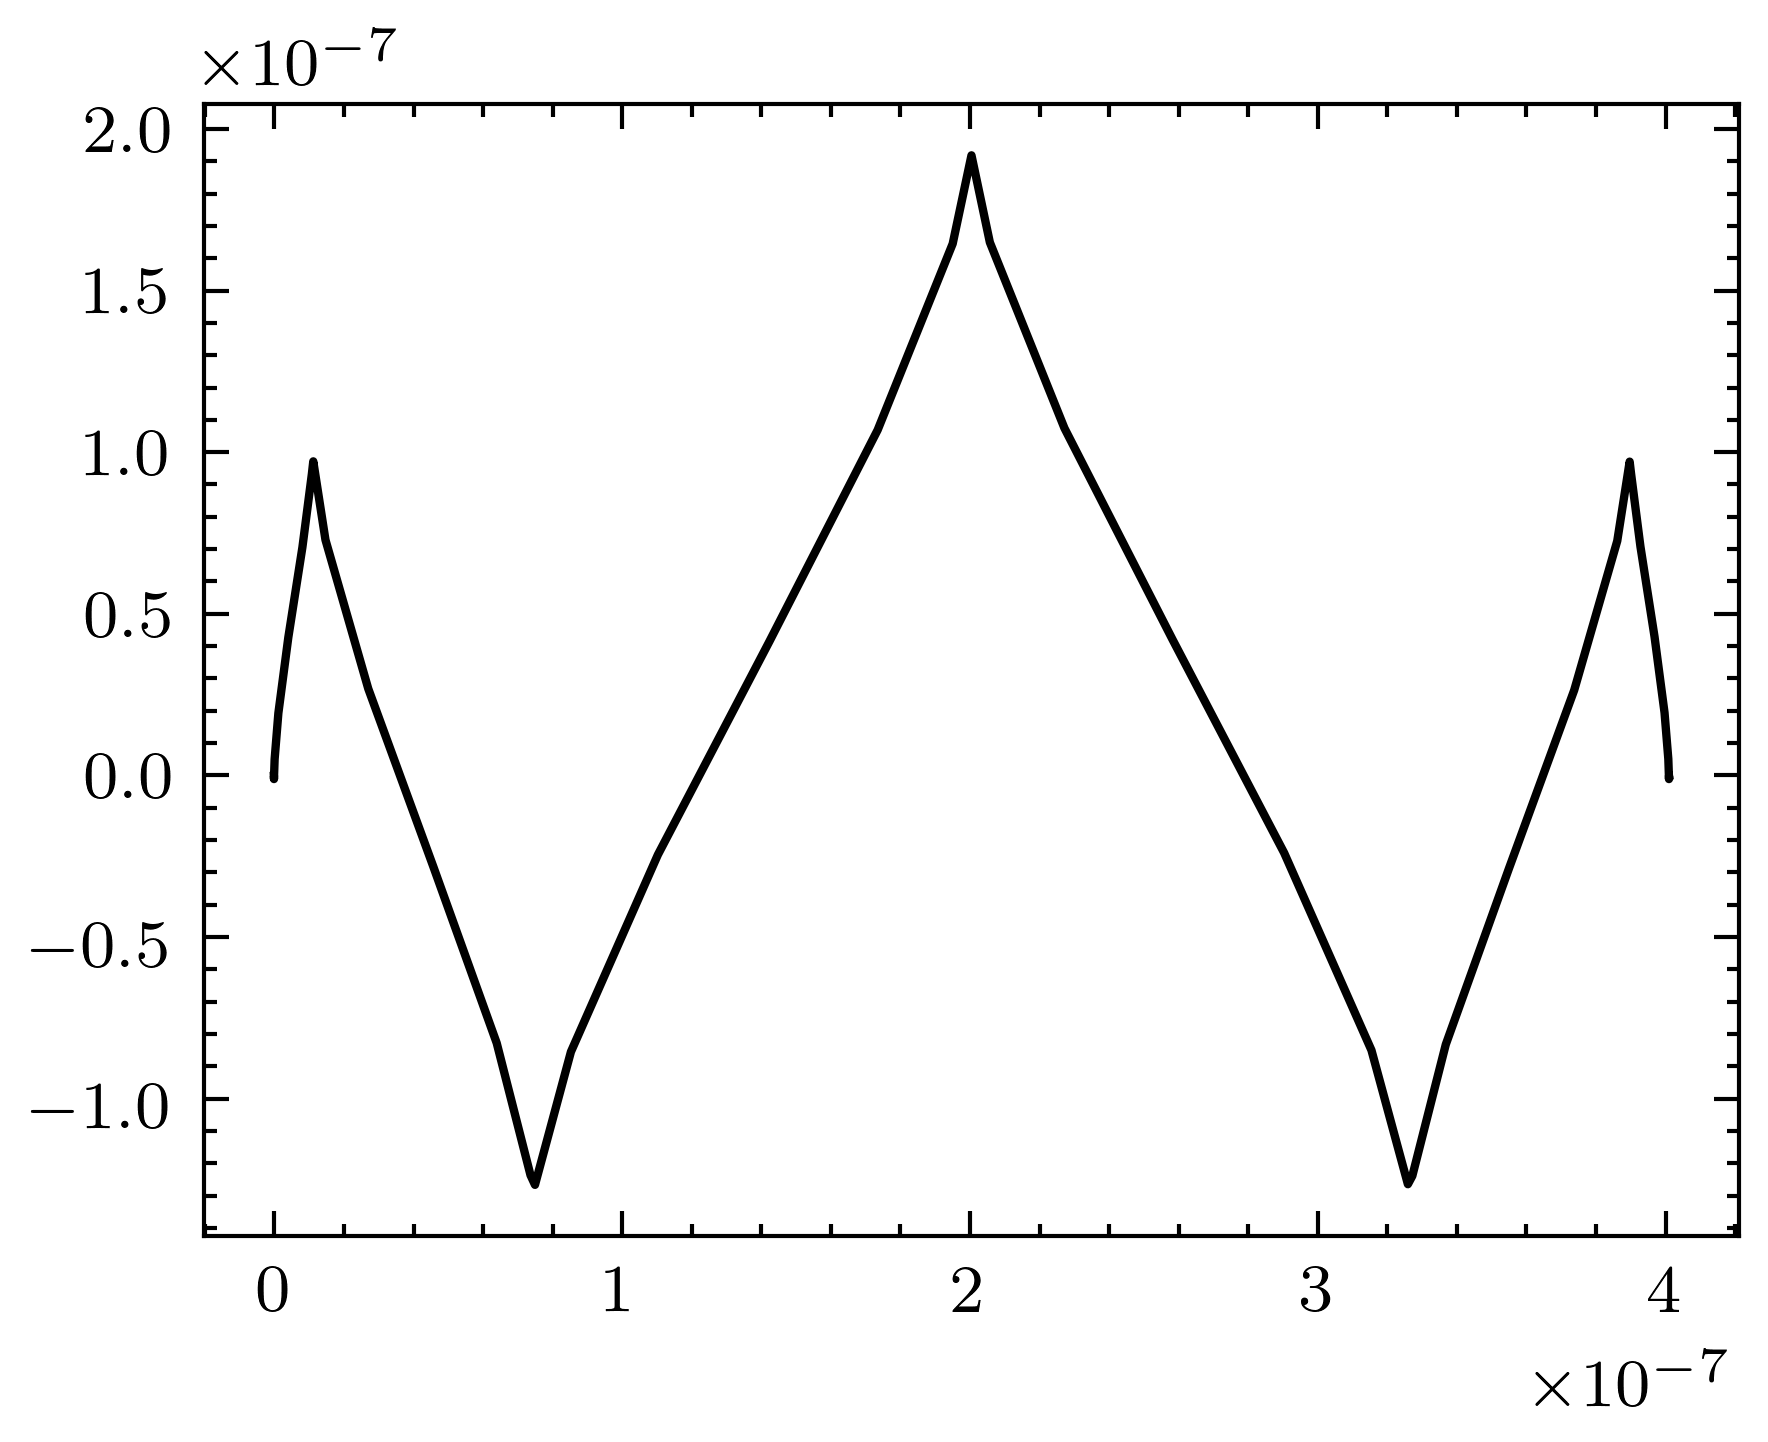

In [20]:
X =np.load("result.npy")
X = X
# x.shape
x = X[:,0,:].mean(axis=0)
y = X[:,1,:].mean(axis=0)
z = X[:,2,:].mean(axis=0)
# sx = X[:,6,:].mean(axis=0)
# sy = X[:,7,:].mean(axis=0)
# sz = X[:,8,:].mean(axis=0)
fig, ax = plt.subplots()
ax.plot(x,y)
# ax.plot(y)
# ax.plot(z)

In [ ]:
plt.

In [13]:
X.shape

(1000000, 9, 100)

# TBMT plot

In [46]:
X = np.load("result.npy")
# X = np.load("result_1e6.npy")
lam = 1e-6
X = X/lam
# x.shape
pos0 = X[:,0,:].mean(axis=0)
pos1 = X[:,1,:].mean(axis=0)

(2, 1000000)
(1000000,)
(1000000,)
1286.9456909624844
(2, 1000000)
(1000000,)
(1000000,)
1516.3352169436598
(2, 1000000)
(1000000,)
(1000000,)
1120.98524012866
(2, 1000000)
(1000000,)
(1000000,)
1091.6220706539223


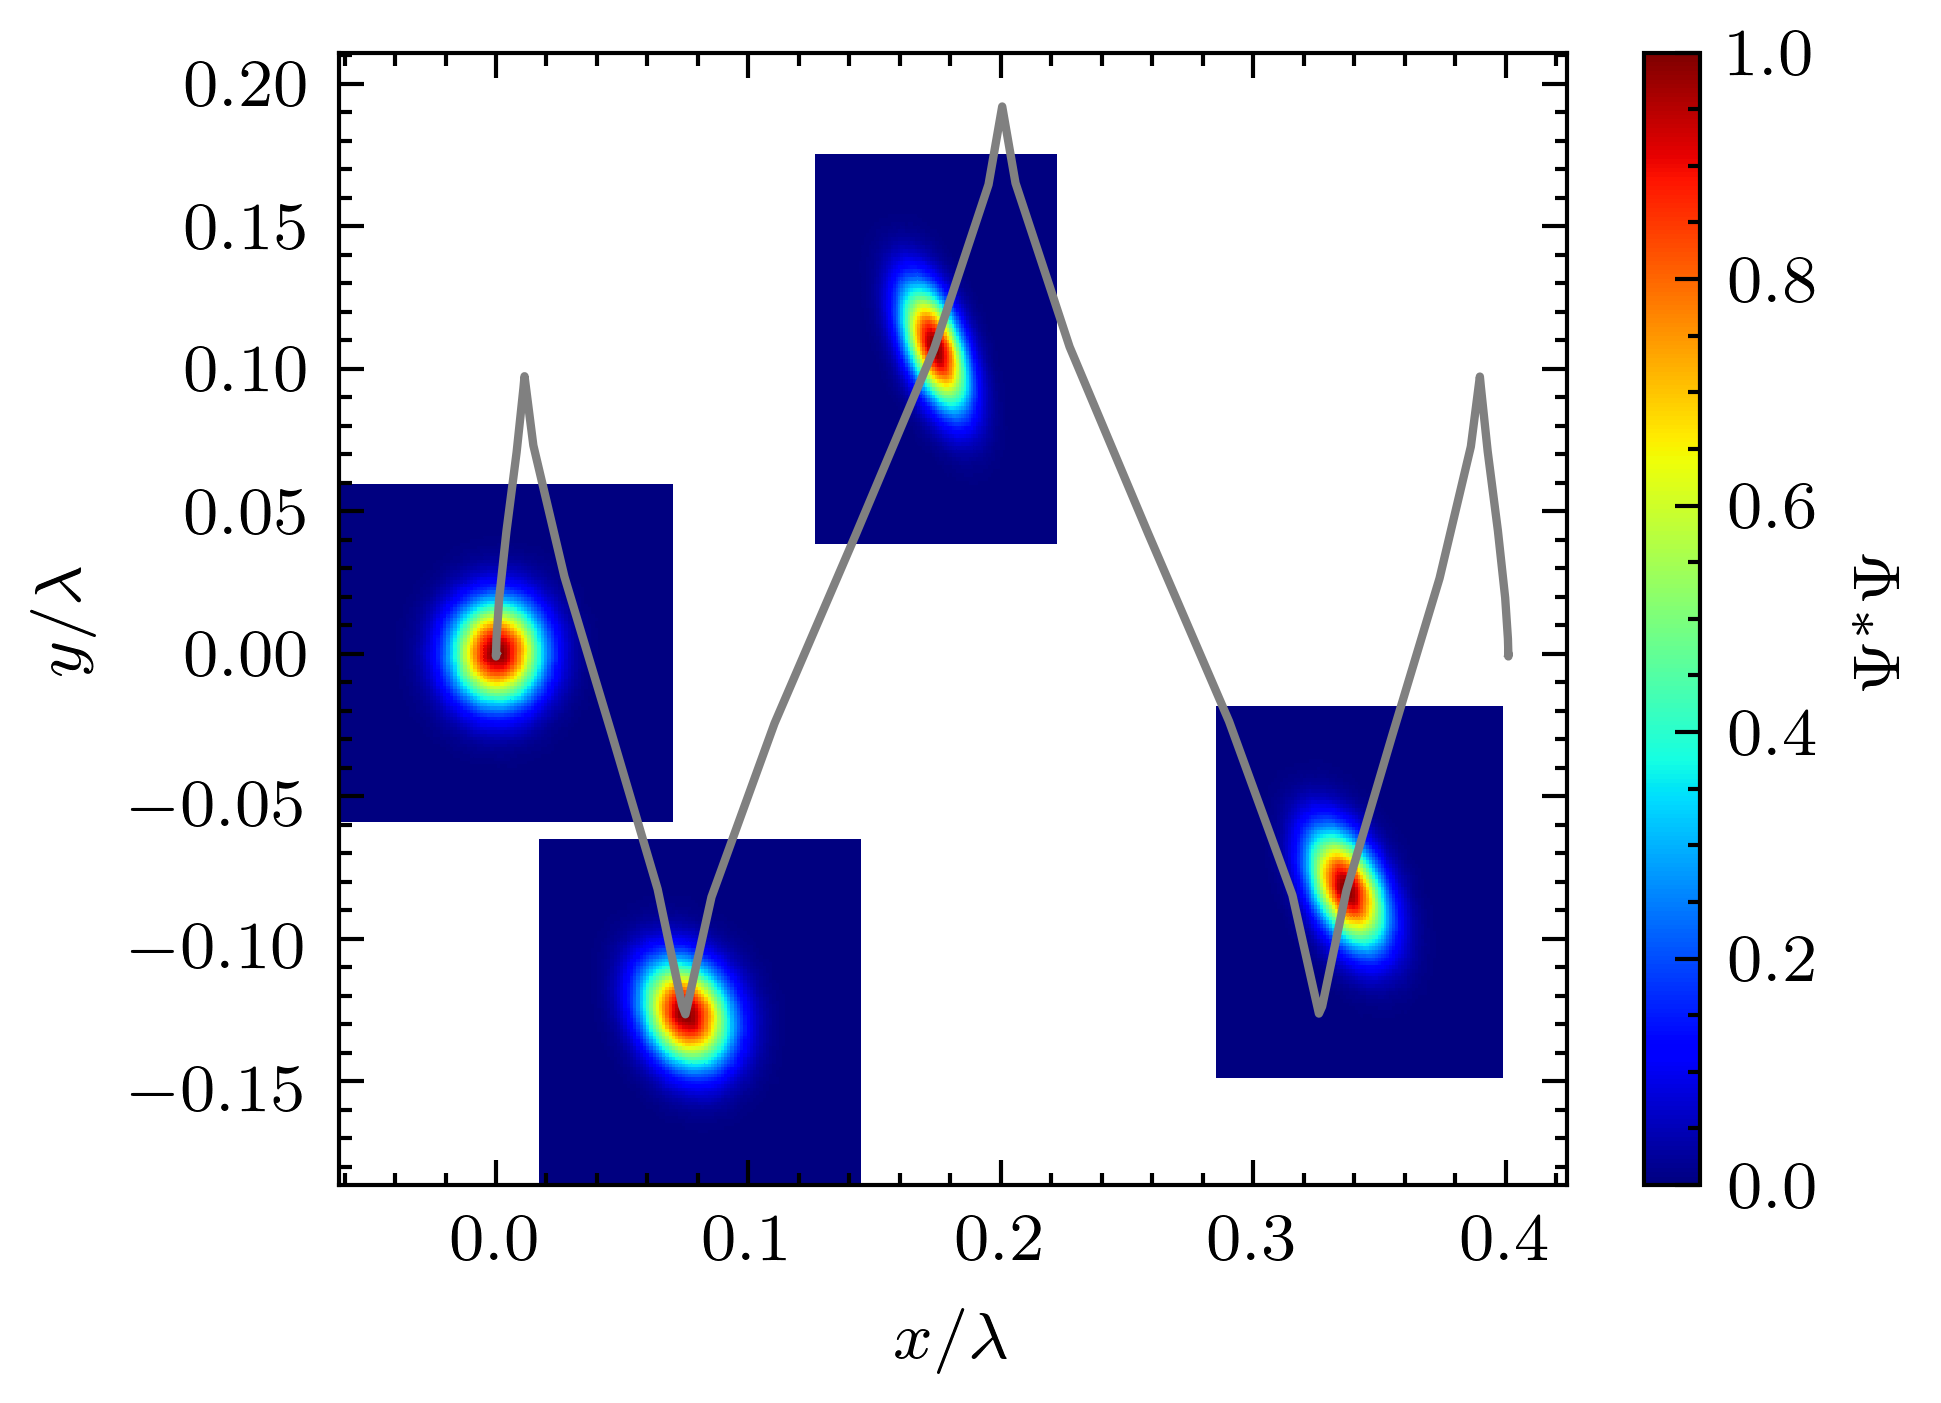

In [47]:
fig, axes = plt.subplots( sharex=True, sharey=True)
axes.plot(pos0,pos1,c='grey')
from scipy.stats import kde
# for i in range(0,1000,100):
ranges = [10,46,50,60]
# ranges = [10]
for i in ranges[::-1]:
#     plt.scatter(x[:,0,i],x[:,1,i], s = 0.1)
    data = np.vstack((X[:,0,i],X[:,1,i]))    
    print(data.shape)
    x, y = data
    print(x.shape)
    print(y.shape)
    nbins = 100

    # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
    k = kde.gaussian_kde(data)
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    pcm = axes.pcolormesh(xi, yi, zi.reshape(xi.shape)/zi.max(), vmax=1.0,vmin=0, cmap='jet')
    print(zi.max())
# fig.tight_layout()
# plt.show()
cbar = fig.colorbar(pcm)
cbar.set_label(r'$\Psi^*\Psi$')
axes.set_xlabel(r'$x/\lambda$')
axes.set_ylabel(r'$y/\lambda$')
fig.savefig("wavepacket.eps")

# axes.axis('equal')
# axes.set_xlim(-4e-10, 5e-9)

In [7]:

fig.savefig("wavepacket.eps")


1645.8959364724735
1863.4059455093668
1871.5510765928539
1893.3270171852707


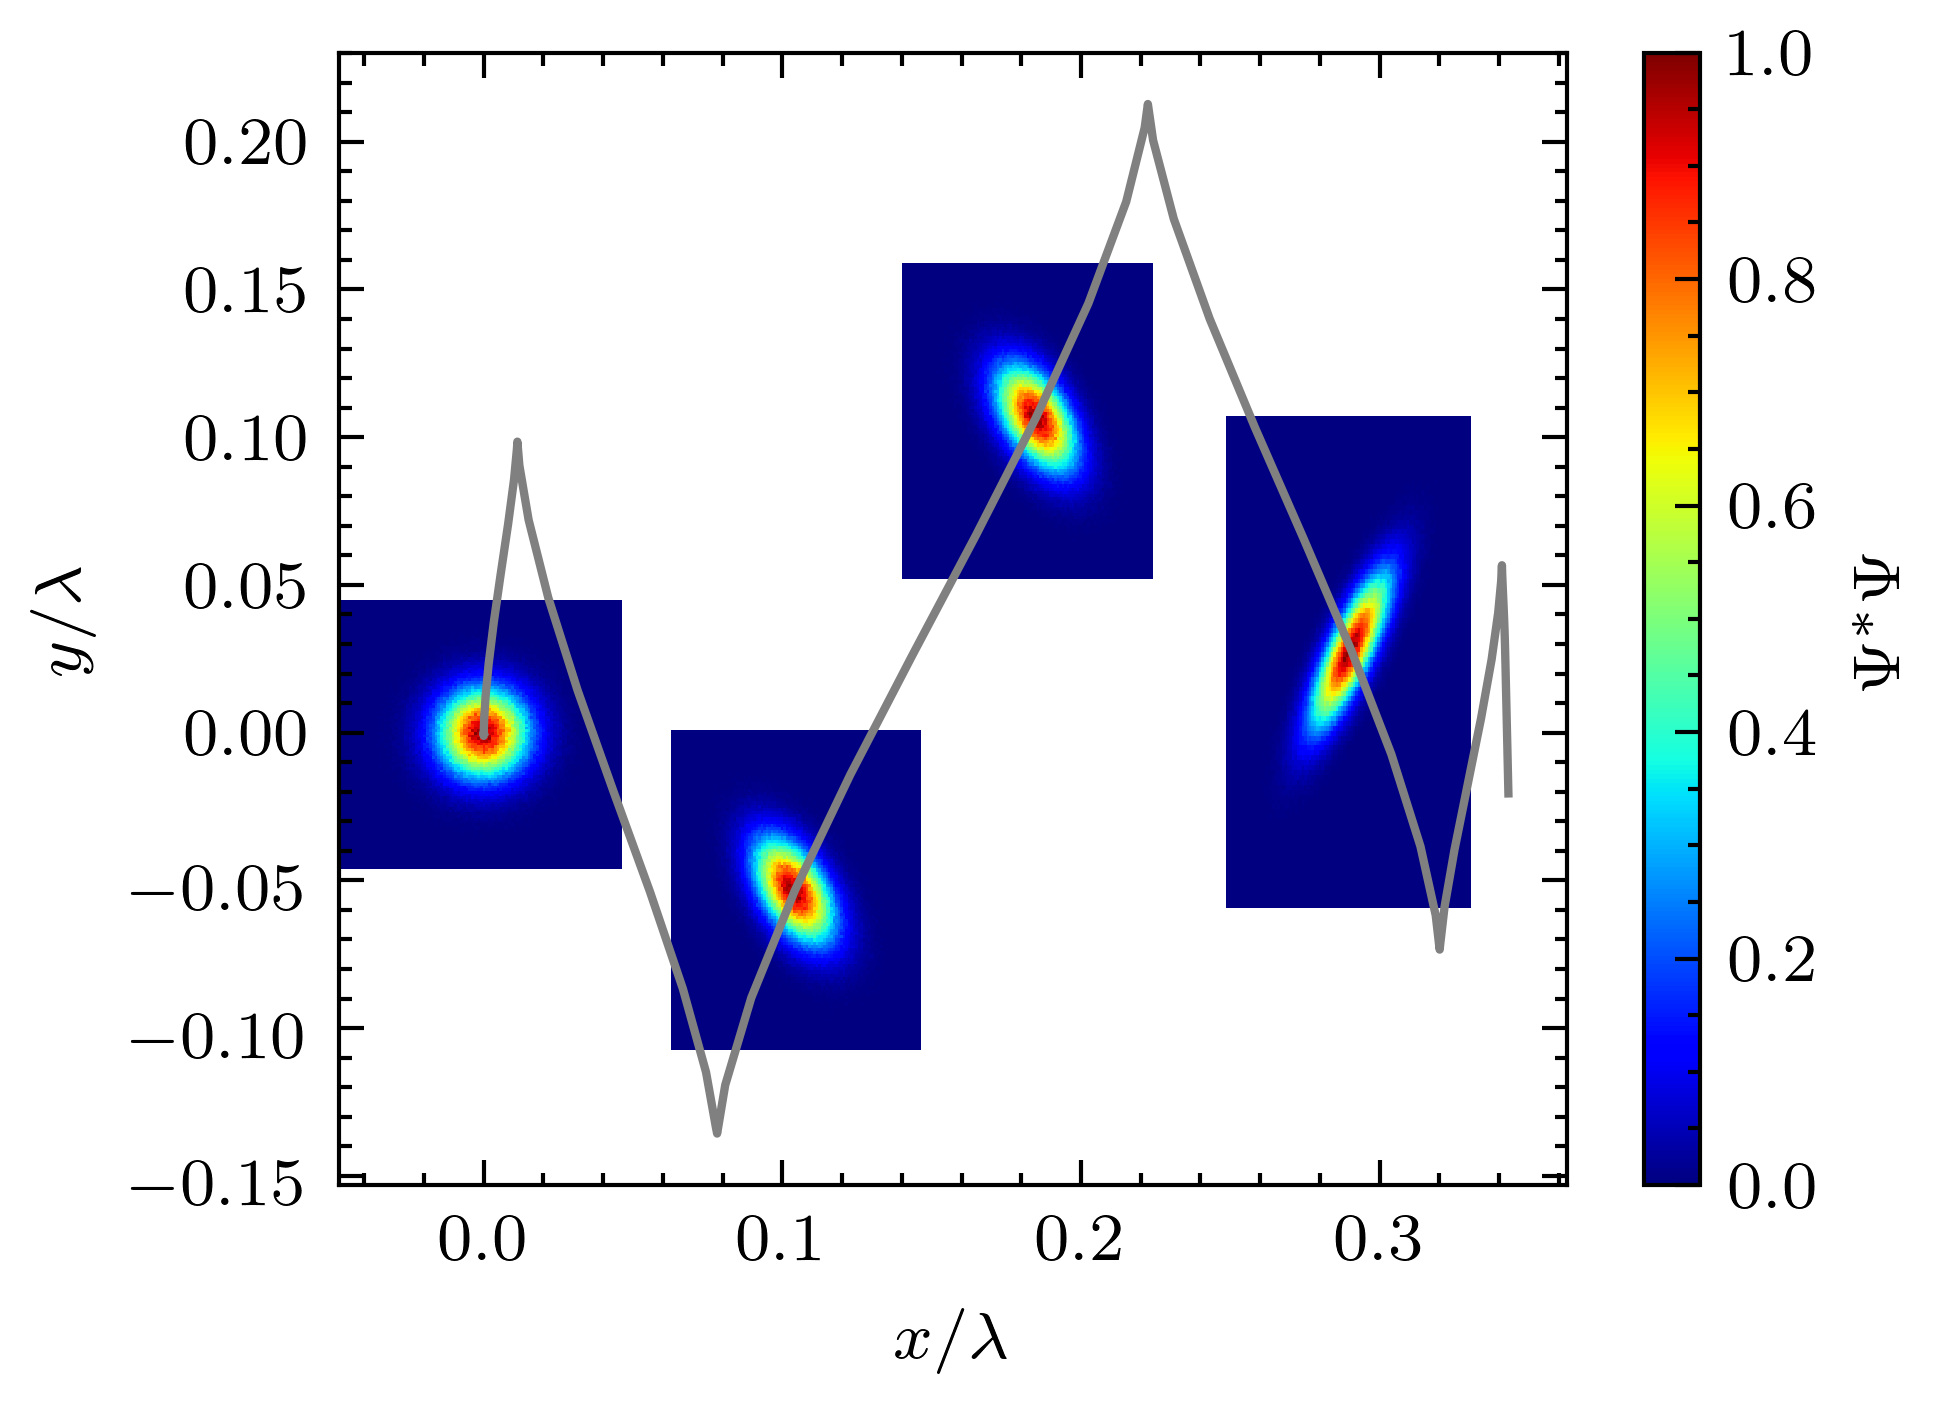

In [44]:
fig, axes = plt.subplots( sharex=True, sharey=True)
axes.plot(pos0,pos1,c='grey')
# from scipy.stats import kde
# ranges = [100,450,500,600]
ranges = [10,46,50,60]
for i in ranges:
#     plt.scatter(x[:,0,i],x[:,1,i], s = 0.1)
    data = np.vstack((X[:,0,i],X[:,1,i]))    
#     print(data.shape)
    x, y = data
#     print(x.shape)
#     print(y.shape)
    nbins = 100
    
    H, xedges, yedges= np.histogram2d(x, y, bins=[nbins,nbins],
                                     density=True,
                                     )
    print(H.max())
    pcm = axes.pcolormesh(xedges, yedges, H.T/H.max(),
                    vmax = 1.0,cmap='jet')
cbar = fig.colorbar(pcm)
cbar.set_label(r'$\Psi^*\Psi$')
# # fig.tight_layout()
# # plt.show()
axes.set_xlabel(r'$x/\lambda$')
axes.set_ylabel(r'$y/\lambda$')
fig.savefig("wavepacket_hist2d.pdf")
# # axes.axis('equal')
# axes.set_xlim(-4e-10, 5e-9)
# axes.set_ylim(-2e-8, 2.5e-8)

In [23]:
x.max()

4.0573400516169066e-10

In [5]:
x[:,0,i].shape

(100000,)

(2000, 2)


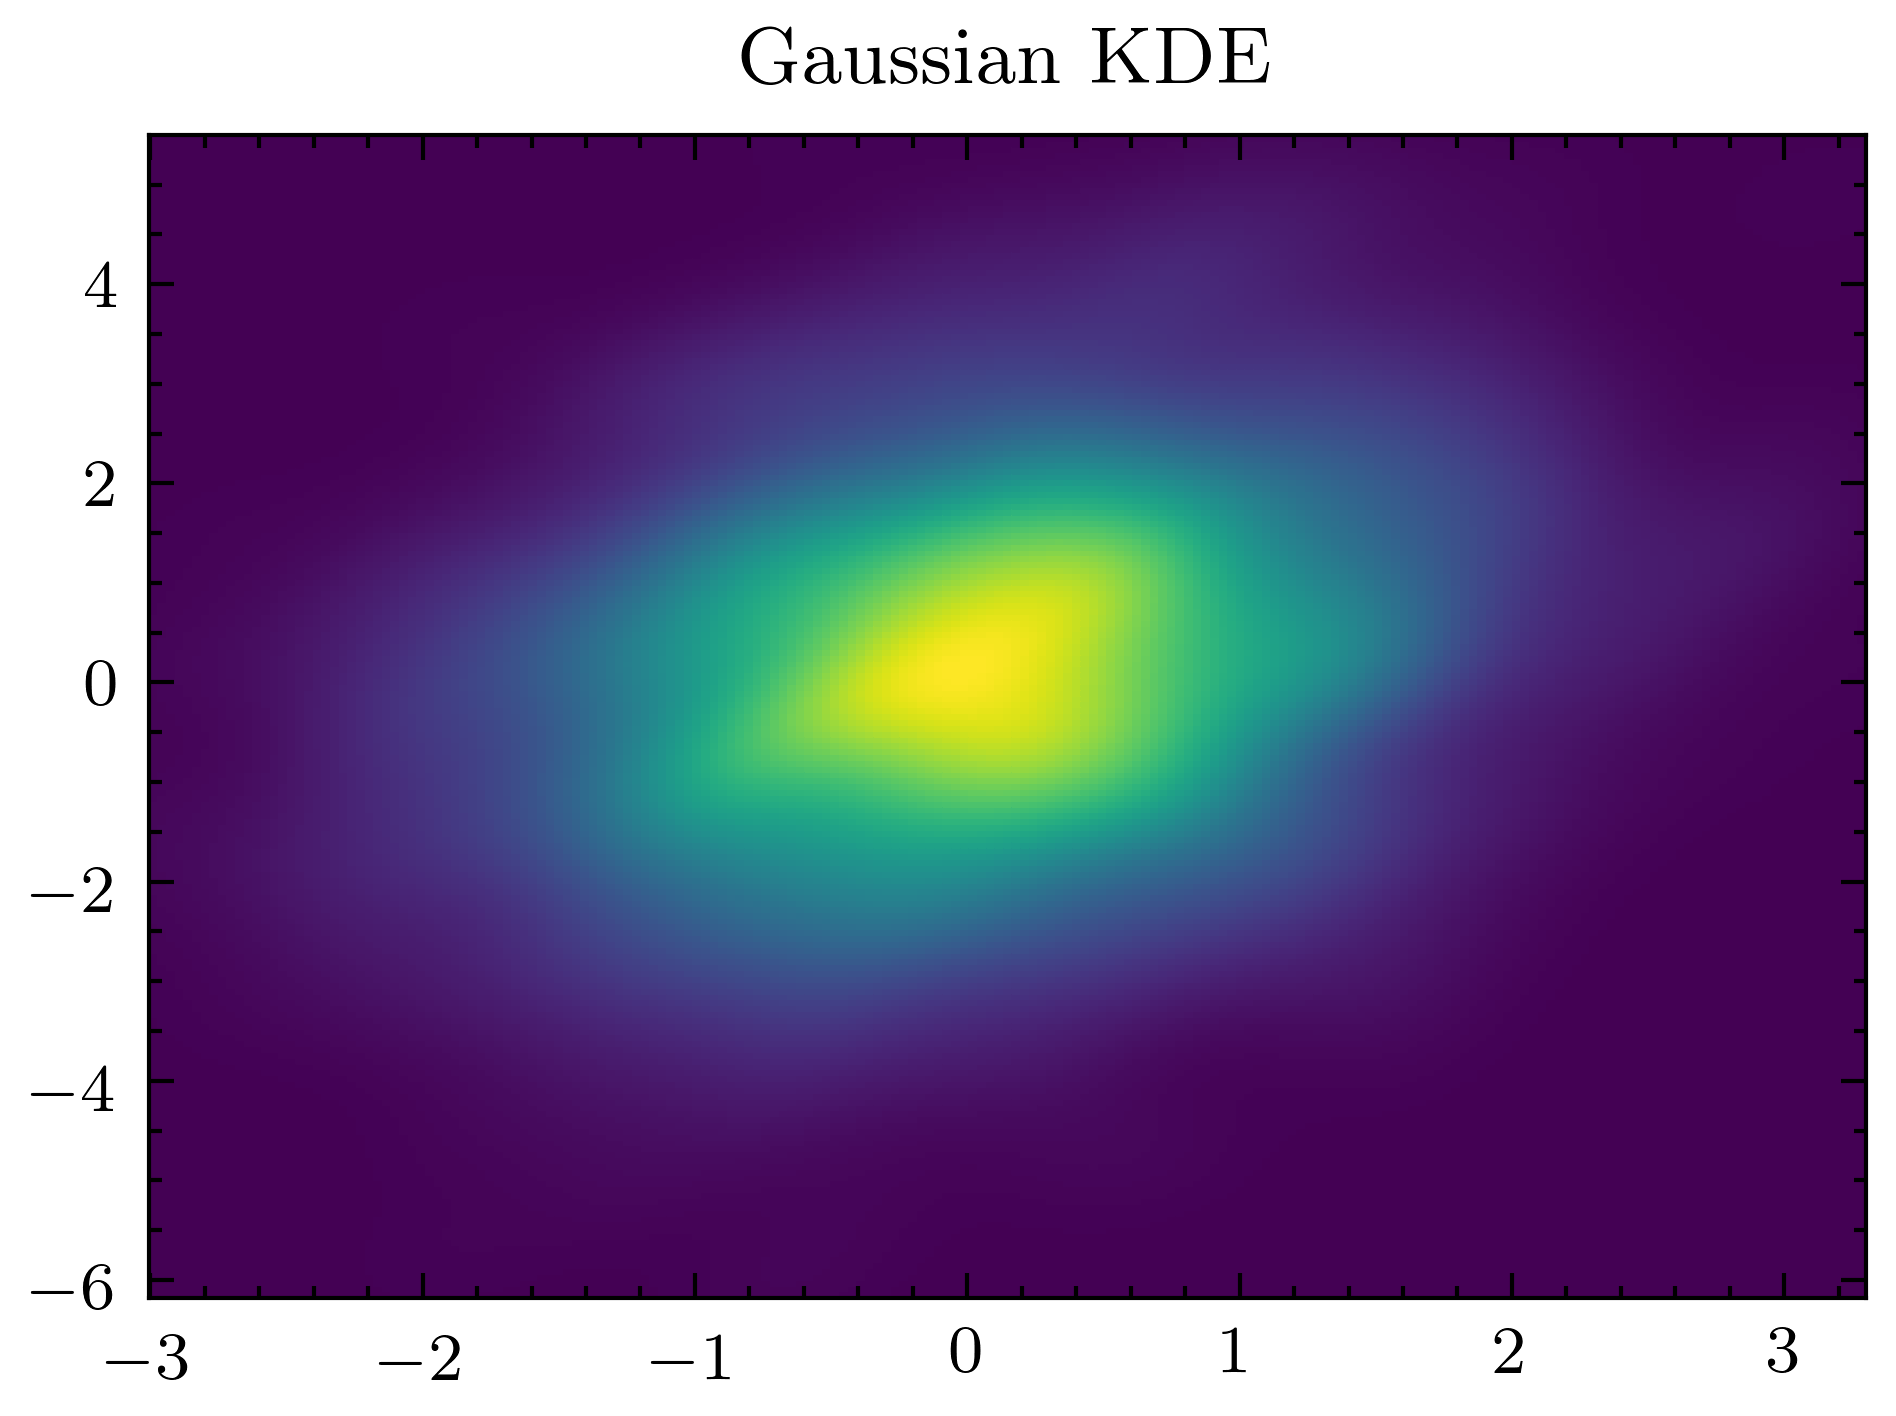

In [24]:
# Generate 200 correlated x,y points
from scipy.stats import kde
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 2000)
x, y = data.T
print(data.shape)
nbins = 200

fig, axes = plt.subplots( sharex=True, sharey=True)

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

axes.set_title('Gaussian KDE')
axes.pcolormesh(xi, yi, zi.reshape(xi.shape))

fig.tight_layout()
plt.show()

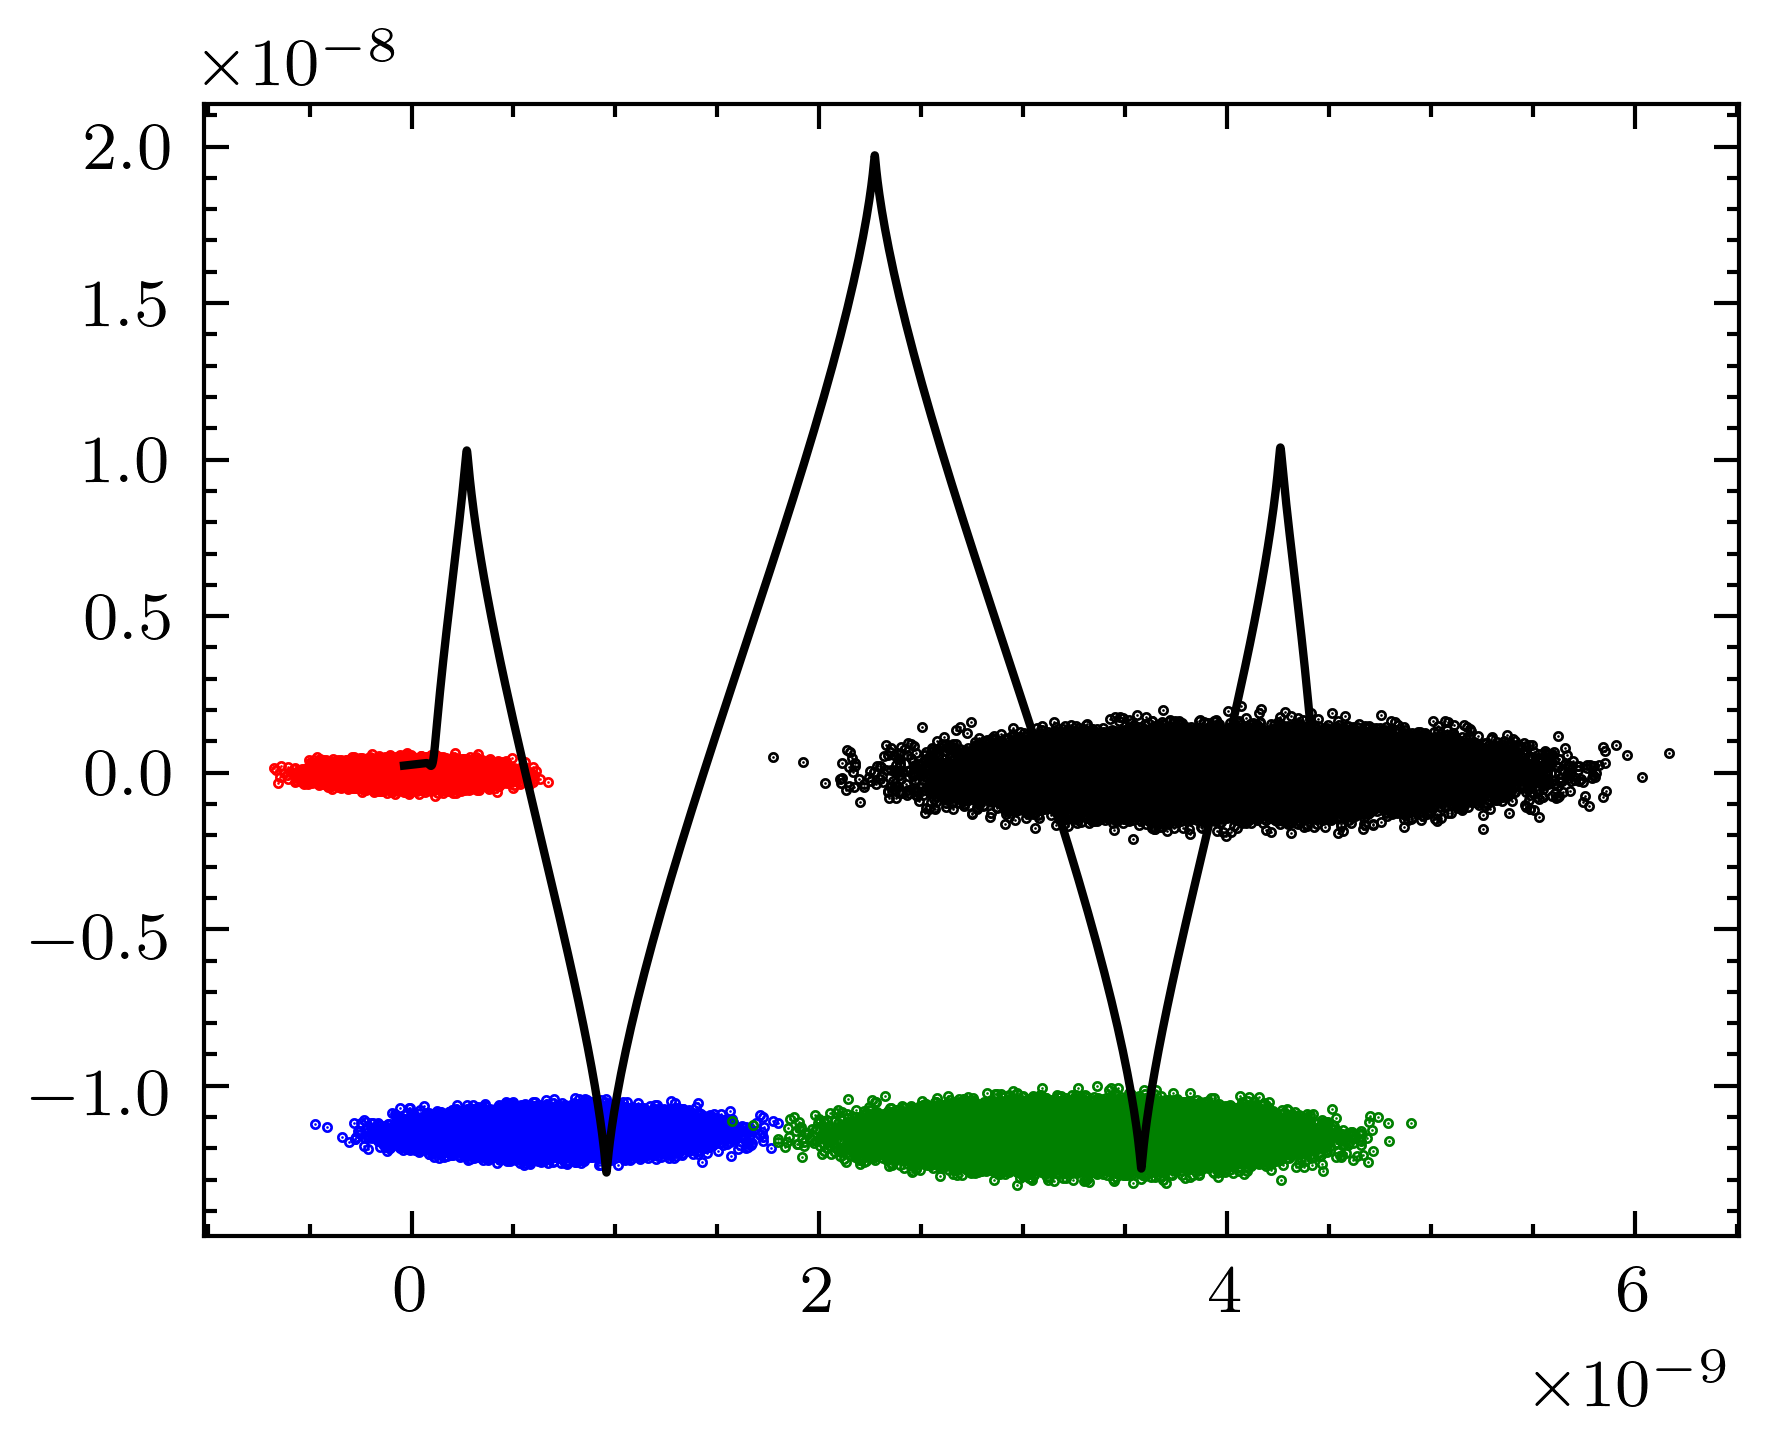

In [18]:
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

In [12]:
x =np.load("result.npy")

In [13]:
x.shape

(100000, 9, 1000)

In [48]:
1/np.sqrt(1-0.51**2)

1.1625549411016565